**Using Keras' Sequential API**

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
housing = fetch_california_housing()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target,test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape

(16512, 8)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
                                 keras.layers.Dense(30, activation = "relu", input_shape = X_train.shape[1:]),
                                 keras.layers.Dense(1)
])

model.compile(loss = "mean_squared_error", optimizer = keras.optimizers.SGD(learning_rate= 1e-3))

In [ ]:
history = model.fit(X_train, y_train, epochs = 20 , validation_split=0.08)

Epoch 1/20
475/475 [==============================] - 1s 1ms/step - loss: 1.4624 - val_loss: 0.7893
Epoch 2/20
475/475 [==============================] - 0s 1ms/step - loss: 0.6887 - val_loss: 0.6798
Epoch 3/20
475/475 [==============================] - 0s 912us/step - loss: 0.6233 - val_loss: 0.6411
Epoch 4/20
475/475 [==============================] - 0s 1ms/step - loss: 0.5880 - val_loss: 0.6118
Epoch 5/20
475/475 [==============================] - 0s 919us/step - loss: 0.5619 - val_loss: 0.5884
Epoch 6/20
475/475 [==============================] - 0s 941us/step - loss: 0.5411 - val_loss: 0.5709
Epoch 7/20
475/475 [==============================] - 0s 1ms/step - loss: 0.5245 - val_loss: 0.5545
Epoch 8/20
475/475 [==============================] - 0s 953us/step - loss: 0.5113 - val_loss: 0.5431
Epoch 9/20
475/475 [==============================] - 0s 960us/step - loss: 0.5005 - val_loss: 0.5328
Epoch 10/20
475/475 [==============================] - 0s 973us/step - loss: 0.4920 - val_

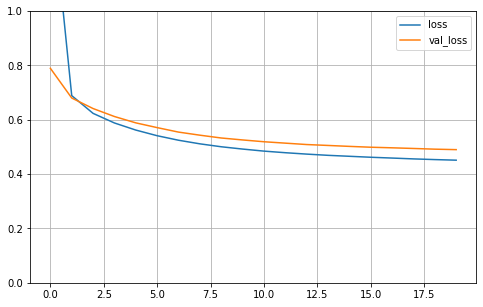

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

129/129 [==============================] - 0s 1ms/step - loss: 0.4720


0.47195321321487427

In [ ]:
y_pred = model.predict(X_test)
y_pred[:5]

array([[0.53112507],
       [1.6260126 ],
       [2.871293  ],
       [2.8382049 ],
       [2.6650732 ]], dtype=float32)

In [18]:
y_pred[np.argmax(y_pred)][0]

7.046217